## Tabu Search (Scheduling)

In [1]:
import pandas as pd
import numpy as np

def CalculateTardiness(result):
    time_used=0
    tardiness=0
    for i in range(len(result)):
        task=result[i]
        time_used=time_used+processingtime[task]
        tardiness=tardiness+weights[task]*max(time_used-due[task],0)
        #print("task:",result[i],"Processing Time:",processingtime[task],"Time Used:",time_used,"Tardiness:",tardiness)
    return tardiness

def tabusearch_iteration(old_result,tabulist,tabulist_size):
    current_tabu=[None]*2
    best_result=old_result.copy()
    for i in range(len(result)-1):
        current_tasklist=old_result.copy()
        
        for j in range(tabulist_size):
            tabu=False
            if(current_tasklist[i]==tabulist[j][0] and current_tasklist[i+1]==tabulist[j][1]):
                tabu=True
                break;
        if(not tabu):
            temp=current_tasklist[i]
            current_tasklist[i]=current_tasklist[i+1]
            current_tasklist[i+1]=temp
            if(CalculateTardiness(current_tasklist)<CalculateTardiness(best_result)):
                current_tabu[0]=current_tasklist[i]
                current_tabu[1]=current_tasklist[i+1]
                best_result=current_tasklist.copy()
            #print("BestResult Now:",best_result,"Cur_tabu",current_tabu,"Tardiness:",CalculateTardiness(best_result))
    return best_result,current_tabu

def tabusearch(result,tabulist_size):
    
    tabulist=[]
    for i in range(tabulist_size):
        null_item=[None,None]
        tabulist.append(null_item)
        
    best_result=result.copy()
    best_tardiness=99999
    stop=0
    iteration_num=0
    
    while(stop<10):
        iteration_num=iteration_num+1
        best_result,current_tabu=tabusearch_iteration(best_result,tabulist,tabulist_size)
        best_result=best_result.copy()
        tabulist.pop(0)
        tabulist.append(current_tabu)
#         print("BEST",best_result)
#         print("new tabu",current_tabu)
#         print("tabulist",tabulist)
#         print("tardiness",CalculateTardiness(best_result))
#         print("Iteration:",iteration_num)
        if(CalculateTardiness(best_result)==best_tardiness):
            stop=stop+1
        best_tardiness=CalculateTardiness(best_result)
        
    return iteration_num,best_tardiness,best_result

In [2]:
import random

num_job=20
size=2

iteration_list=[]
tardiness_list=[]

processingtime=[10,10,13,4,9,4,8,15,7,1,9,3,15,9,11,6,5,14,18,3]
due=[50,38,49,12,20,105,73,45,6,64,15,6,92,43,78,21,15,50,150,99]
weights=[10,5,1,5,10,1,5,10,5,1,5,10,10,5,1,10,5,5,1,5]

for i in range(10):
    result=list(np.random.permutation(num_job))
    result_run=result.copy()
    iteration,best_tardiness,best_result=tabusearch(result_run,size)
    iteration_list.append(iteration)
    tardiness_list.append(best_tardiness)
    print("Best_tardiness:",best_tardiness)
    print("Iteration:",iteration)
    print("Best Scheduling:",best_result)

print()
print("Averate Iteration:",sum(iteration_list)/len(iteration_list))
print("Averate Tardiness:",sum(tardiness_list)/len(tardiness_list))

Best_tardiness: 2533
Iteration: 64
Best Scheduling: [11, 10, 4, 15, 8, 7, 0, 9, 6, 17, 12, 19, 3, 16, 13, 1, 5, 14, 2, 18]
Best_tardiness: 2236
Iteration: 79
Best Scheduling: [11, 3, 5, 9, 15, 4, 16, 8, 0, 7, 6, 1, 12, 19, 10, 13, 17, 14, 2, 18]
Best_tardiness: 2576
Iteration: 61
Best Scheduling: [11, 16, 10, 15, 4, 1, 0, 8, 9, 13, 6, 17, 5, 19, 3, 7, 12, 14, 2, 18]
Best_tardiness: 2108
Iteration: 106
Best Scheduling: [11, 8, 3, 15, 4, 10, 0, 7, 9, 6, 1, 12, 19, 16, 13, 17, 5, 14, 2, 18]
Best_tardiness: 2287
Iteration: 80
Best Scheduling: [11, 3, 6, 15, 4, 16, 7, 0, 8, 9, 1, 12, 19, 10, 13, 17, 5, 14, 2, 18]
Best_tardiness: 2198
Iteration: 49
Best Scheduling: [9, 11, 8, 4, 15, 3, 7, 0, 16, 13, 1, 17, 19, 12, 6, 10, 5, 14, 2, 18]
Best_tardiness: 3082
Iteration: 73
Best Scheduling: [11, 8, 3, 4, 16, 7, 0, 1, 9, 6, 14, 2, 19, 15, 12, 10, 13, 17, 5, 18]
Best_tardiness: 2198
Iteration: 68
Best Scheduling: [11, 8, 16, 15, 3, 4, 13, 0, 1, 9, 6, 10, 17, 19, 12, 7, 5, 14, 2, 18]
Best_tardiness:

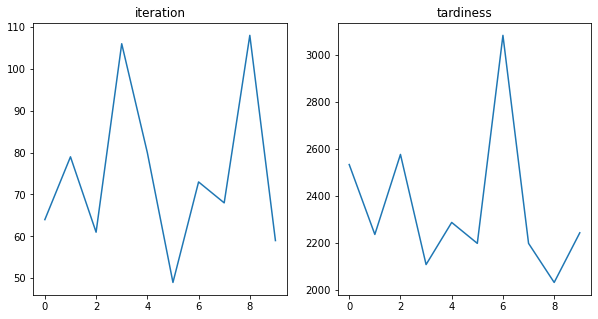

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(iteration_list)
plt.title("iteration")

plt.subplot(1,2,2)
plt.plot(tardiness_list)
plt.title("tardiness")
    
plt.show()